# Importar librerias..

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


In [3]:
import cv2

In [4]:
from tensorflow.keras.optimizers import Adam

# Cargando imagenes de entrenamiento..

In [5]:
dirname = os.path.join(os.getcwd(), 'data/entrenamiento')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            
            img = cv2.imread(filepath,0)
            img = cv2.resize(img, (200, 200))
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.normalize(img,img,0,255, cv2.NORM_MINMAX)
            img = np.reshape(img, (200,200,1))
            
            images.append(img)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\pukay\Documents\10 ciclo\Salazar\evaluacion\data/entrenamiento\
C:\Users\pukay\Documents\10 ciclo\Salazar\evaluacion\data/entrenamiento\NORMAL 1
C:\Users\pukay\Documents\10 ciclo\Salazar\evaluacion\data/entrenamiento\PNEUMONIA 1349
Directorios leidos: 2
Imagenes en cada directorio [1350, 3882]
suma Total de imagenes en subdirs: 5232


In [13]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("imagenes subidas: ",len(labels))

imagenes subidas:  5232


In [14]:
dupla=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    dupla.append(name[len(name)-1])
    indice=indice+1

0 NORMAL
1 PNEUMONIA


In [15]:
train_Y = np.array(labels)
train_X = np.array(images, dtype=np.uint8)

# Cargando imagenes de test

In [16]:
dirname2 = os.path.join(os.getcwd(), 'data/test')
imgpath2 = dirname2 + os.sep 

images2 = []
directories2 = []
dircount2 = []
prevRoot2=''
cant=0

print("leyendo imagenes de ",imgpath2)

for root, dirnames, filenames in os.walk(imgpath2):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            
            img = cv2.imread(filepath,0)
            img = cv2.resize(img, (200, 200))
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.normalize(img,img,0,255, cv2.NORM_MINMAX)
            img = np.reshape(img, (200,200,1))
            
            images2.append(img)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot2 !=root:
                print(root, cant)
                prevRoot2=root
                directories2.append(root)
                dircount2.append(cant)
                cant=0
dircount2.append(cant)

dircount2 = dircount2[1:]
dircount2[0]=dircount2[0]+1
print('Directorios leidos:',len(directories2))
print("Imagenes en cada directorio", dircount2)
print('suma Total de imagenes en subdirs:',sum(dircount2))

leyendo imagenes de  C:\Users\pukay\Documents\10 ciclo\Salazar\evaluacion\data/test\
C:\Users\pukay\Documents\10 ciclo\Salazar\evaluacion\data/test\NORMAL 1
C:\Users\pukay\Documents\10 ciclo\Salazar\evaluacion\data/test\PNEUMONIA 234
Directorios leidos: 2
Imagenes en cada directorio [235, 389]
suma Total de imagenes en subdirs: 624


In [17]:
labels2=[]
indice=0
for cantidad in dircount2:
    for i in range(cantidad):
        labels2.append(indice)
    indice=indice+1
print("imagenes subidas: ",len(labels2))

imagenes subidas:  624


In [18]:
test_Y = np.array(labels2)
test_X = np.array(images2, dtype=np.uint8)

# Ver imagenes

Text(0.5, 1.0, 'Ground Truth : 0')

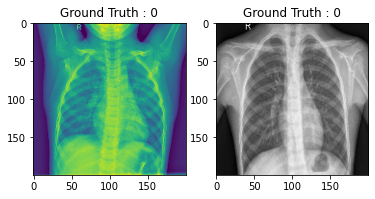

In [19]:

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:])
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# preprocesamiento

In [20]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# validacion

In [21]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 0
After conversion to one-hot: [1. 0.]
(4185, 200, 200, 1) (1047, 200, 200, 1) (4185, 2) (1047, 2)


# Modelo

In [22]:
epochs = 10 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2),padding='same'))


model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation= 'softmax'))




In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0

In [25]:
optimizer = Adam(lr=0.0001, decay=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
66/66 [==============================] - 144s 2s/step - loss: 0.5481 - accuracy: 0.7398 - val_loss: 0.4834 - val_accuracy: 0.7287
Epoch 2/10
66/66 [==============================] - 157s 2s/step - loss: 0.3632 - accuracy: 0.8318 - val_loss: 0.2798 - val_accuracy: 0.8997
Epoch 3/10
66/66 [==============================] - 158s 2s/step - loss: 0.2358 - accuracy: 0.9049 - val_loss: 0.2218 - val_accuracy: 0.9102
Epoch 4/10
66/66 [==============================] - 173s 3s/step - loss: 0.1928 - accuracy: 0.9228 - val_loss: 0.1691 - val_accuracy: 0.9417
Epoch 5/10
66/66 [==============================] - 167s 3s/step - loss: 0.1618 - accuracy: 0.9410 - val_loss: 0.1457 - val_accuracy: 0.9484
Epoch 6/10
66/66 [==============================] - 167s 3s/step - loss: 0.1458 - accuracy: 0.9467 - val_loss: 0.1316 - val_accuracy: 0.9522
Epoch 7/10
66/66 [==============================] - 166s 3s/step - loss: 0.1321 - accuracy: 0.9532 - val_loss: 0.1381 - val_accuracy: 0.9427
Epoch 8/10
66

In [27]:
model.save("modelo95.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: modelo95.h5py\assets


In [28]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

20/20 [==============================] - 4s 216ms/step - loss: 0.7707 - accuracy: 0.7933


In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.7707363367080688
Test accuracy: 0.7932692170143127


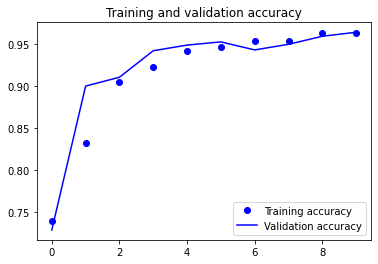

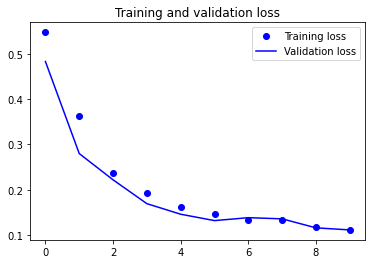

In [30]:
accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes2 = model.predict(test_X)

# Matriz de confusión

In [32]:
y_pred1 = model.predict(test_X)
print(y_pred1)

[[7.9865295e-01 2.0134707e-01]
 [2.6247886e-01 7.3752111e-01]
 [7.7211307e-03 9.9227881e-01]
 ...
 [2.5195561e-05 9.9997485e-01]
 [1.6742678e-03 9.9832577e-01]
 [1.5839191e-02 9.8416084e-01]]


In [33]:
y_pred = np.argmax(model.predict(test_X), axis=-1)
classes=[0,1]
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_Y,y_pred)
print(cm)

[[108 127]
 [  2 387]]


In [35]:
import pandas as pd
cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
cm_df = pd.DataFrame(cm_norm,
                     index = classes, 
                     columns = classes)
print(cm_df)

      0     1
0  0.46  0.54
1  0.01  0.99


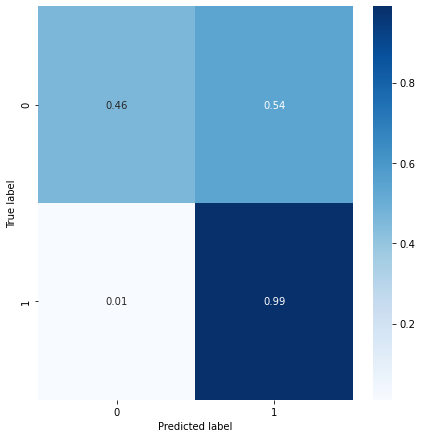

In [36]:
import seaborn as sns
figure = plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# prediccion de una nueva imagen

In [37]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['data/test/pneumonia/person80_bacteria_391.jpeg']

for filepath in filenames:
   
            img = cv2.imread(filepath,0)
            img = cv2.resize(img, (200, 200))
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.normalize(img,img,0,255, cv2.NORM_MINMAX)
            img= np.reshape(img, (200,200,1))
            images.append(img)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')


predicted_classes = model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], dupla[img_tagged.tolist().index(max(img_tagged))])

data/test/pneumonia/person80_bacteria_391.jpeg PNEUMONIA
